# 1. Setup + Import Libraries

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

style.use('ggplot')
sns.set_palette("flare")


# 2. Load & Clean Dataset

In [ ]:


# Replace with your uploaded file name
df = pd.read_csv("sales_retail.csv")

# 🧹 Basic Cleaning
df.columns = [col.strip().replace(" ", "_") for col in df.columns]
df.dropna(how='all', inplace=True)

# Convert Order_Date to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df = df[df['Order_Date'].notnull()]  # Drop rows with invalid date



# 3.EDA PROCESS

In [ ]:
# Basic Info
print(df.info())
print(df.describe())
print(df.head())



<class 'pandas.core.frame.DataFrame'>
Index: 4042 entries, 0 to 9991
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       4042 non-null   object        
 1   Customer_Name  4042 non-null   object        
 2   Category       4042 non-null   object        
 3   Sub_Category   4042 non-null   object        
 4   City           4042 non-null   object        
 5   Order_Date     4042 non-null   datetime64[ns]
 6   Region         4042 non-null   object        
 7   Sales          4042 non-null   int64         
 8   Discount       4042 non-null   float64       
 9   Profit         4042 non-null   float64       
 10  State          4042 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 378.9+ KB
None
                          Order_Date        Sales     Discount       Profit
count                           4042  4042.000000  4042.000000  4042.00

In [ ]:

print(f" Rows: {df.shape[0]} | Columns: {df.shape[1]}")
print(f" Columns: {list(df.columns)}")
df.head(3)


 Rows: 4042 | Columns: 11
 Columns: ['Order_ID', 'Customer_Name', 'Category', 'Sub_Category', 'City', 'Order_Date', 'Region', 'Sales', 'Discount', 'Profit', 'State']


,Order_ID,Customer_Name,Category,Sub_Category,City,Order_Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu


In [ ]:
print("\n Missing Values:")
display(df.isnull().sum())


 Missing Values:


,0
Order_ID,0
Customer_Name,0
Category,0
Sub_Category,0
City,0
Order_Date,0
Region,0
Sales,0
Discount,0
Profit,0


## Sales Trend Over Time

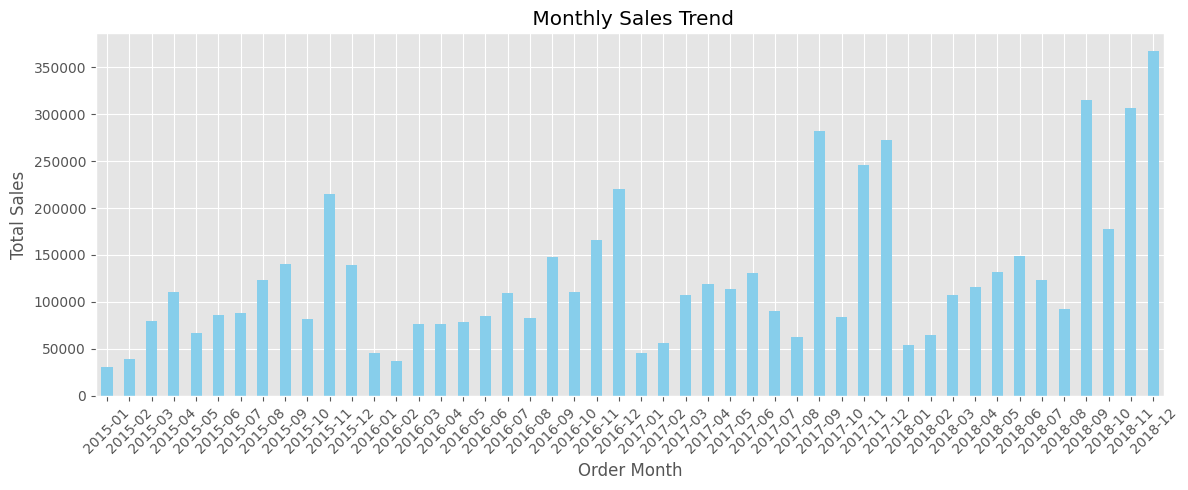

In [ ]:

plt.figure(figsize=(12, 5))
df.groupby(df['Order_Date'].dt.to_period("M"))['Sales'].sum().plot(kind='bar', color='skyblue')
plt.title(" Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Order Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Sales by City (Top 10)

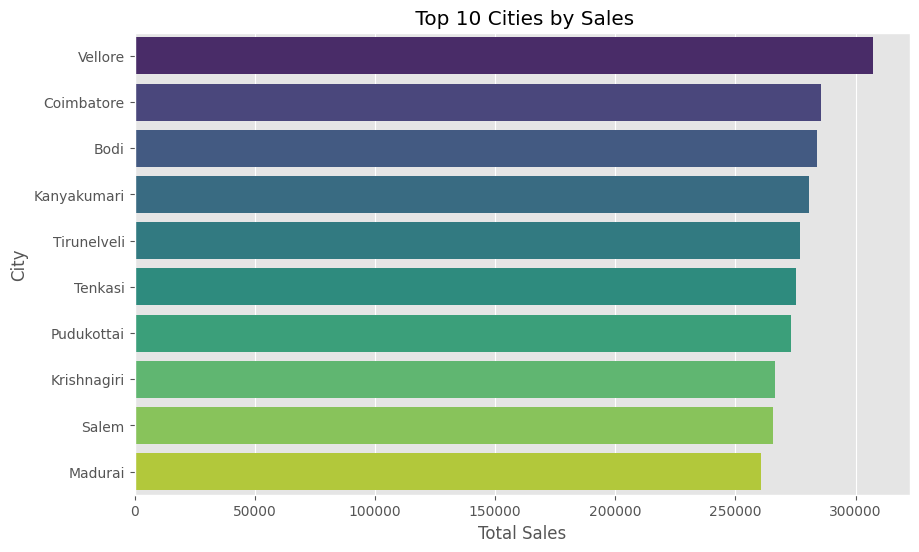

In [ ]:
top_cities = df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, hue=top_cities.index, dodge=False, palette="viridis", legend=False)

plt.title(" Top 10 Cities by Sales")
plt.xlabel("Total Sales")
plt.ylabel("City")
plt.show()


## Category vs Profit

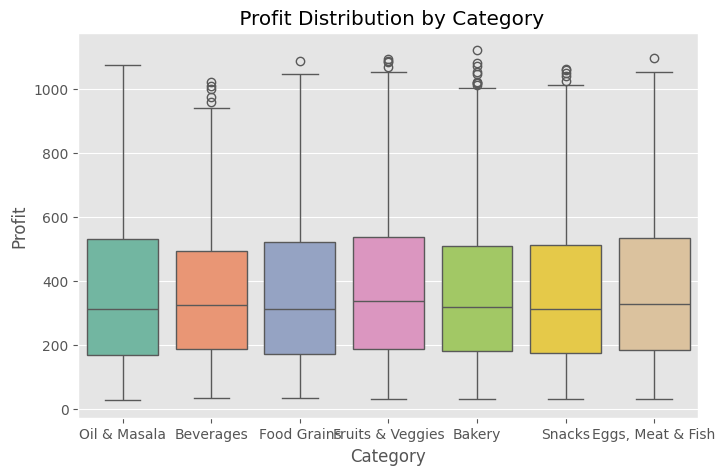

In [ ]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Category", y="Profit", hue="Category", dodge=False, palette="Set2", legend=False)

plt.title(" Profit Distribution by Category")
plt.show()


## Region-wise Sales & Profit

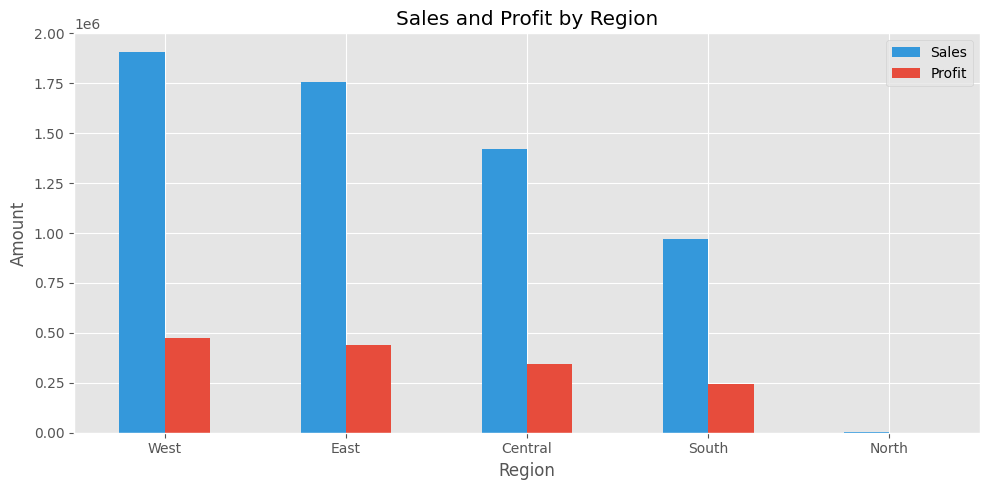

In [ ]:

region_stats = df.groupby("Region")[["Sales", "Profit"]].sum().sort_values(by="Sales", ascending=False)
region_stats.plot(kind='bar', figsize=(10, 5), color=["#3498db", "#e74c3c"])
plt.title("Sales and Profit by Region")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Discount vs Profit Relationship

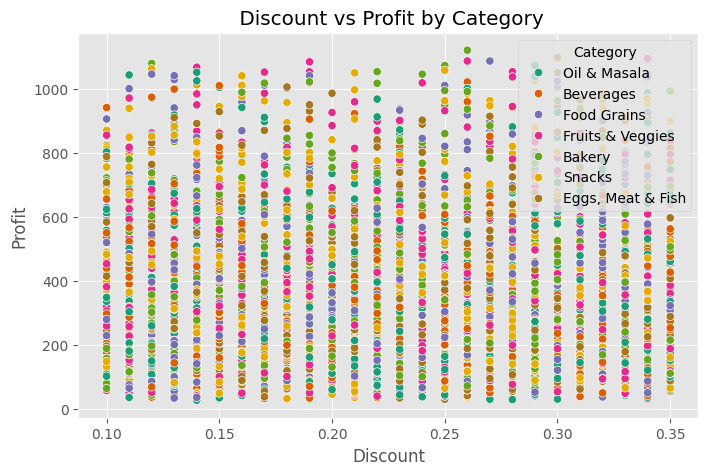

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Discount", y="Profit", hue="Category", palette="Dark2")
plt.title(" Discount vs Profit by Category")
plt.show()

## Heatmap of Correlation

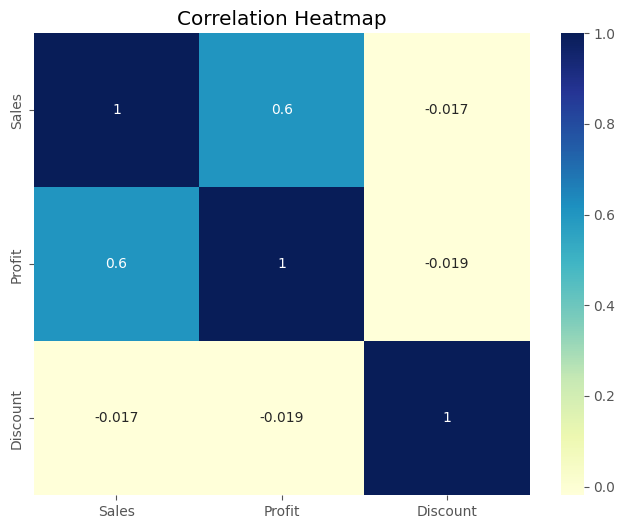

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Sales', 'Profit', 'Discount']].corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()


# EDA Recommendations Report

**1.Monthly Sales Trend**

Insight: Strong seasonality with major sales spikes in Q4 (especially November & December).

Recommendation:

-Boost inventory & marketing for Q4 months to meet high demand.

-Introduce early promotions in Q3 to capture early shoppers and smooth peak load.

**2.Profit Distribution by Category**

Insight: Most categories show similar median profit, but "Oil & Masala" has a slightly higher profit range with fewer low-profit outliers.

Recommendation:

-Focus on expanding high-margin categories like Oil & Masala.

-Review pricing or reduce cost for low outlier products within other categories to lift median profit.

**3. Sales and Profit by Region**

Insight: West and East regions dominate in both sales and profit. North region contributes almost nothing.

Recommendation:

-Expand marketing and logistics in the North to tap into untapped market potential.

-Focus cost optimization in South & Central to raise profits closer to sales levels.

**4. Correlation Heatmap**

Insight: Weak correlation between Discount and Profit (≈ -0.02), suggesting discounts may not impact profitability directly.

Recommendation:

-Rethink blanket discount strategies. Instead, use targeted promotions based on customer segments or underperforming products.

**5. Discount vs Profit by Category**

Insight: No clear trend between discount % and profit. All categories show profit scatter across discount levels.

Recommendation:

-Run A/B testing to evaluate optimal discount rates by category rather than applying flat rates.

-Introduce loyalty-based incentives over discounts to maintain margins.